# GEOG5990M Final Assignment (Template)

Student ID number: 201781605

In [ ]:
# read in required packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetics for seaborn
sns.set(style="whitegrid")

# Ensuring plots are displayed inline in the Jupyter Notebook
%matplotlib inline

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



In [ ]:
# Load the datasets
median_prices = pd.read_csv('/content/Median_Prices_Quarterly.csv')
transaction_counts = pd.read_csv('/content/Transaction_Count_Quarterly.csv')

# Display the first few rows to understand their structure
print(median_prices.head())
print(transaction_counts.head())

   Unnamed: 0    lsoa_cd  median_95Q1  median_95Q2  median_95Q3  median_95Q4  \
0           1        NaN      59000.0      62500.0      55000.0      60000.0   
1           2  E01000001      99500.0     112475.0     123500.0     104671.0   
2           3  E01000002     110000.0     135000.0     112500.0     132000.0   
3           4  E01000003      75000.0      64200.0      66000.0      92000.0   
4           5  E01000005          NaN          NaN      61000.0          NaN   

   median_96Q1  median_96Q2  median_96Q3  median_96Q4  ...  median_16Q3  \
0      61495.0      50000.0      70500.0      71000.0  ...      86415.0   
1     129000.0     129750.0     152500.0     169375.0  ...     880000.0   
2     119275.0     112000.0     135000.0     117500.0  ...     852500.0   
3      90000.0      65000.0      73000.0      90000.0  ...     795000.0   
4      55000.0      70000.0          NaN      55000.0  ...     590000.0   

   median_16Q4  median_17Q1  median_17Q2  median_17Q3  median_17Q4  

In [ ]:
# Checking for missing values
print(median_prices.isnull().sum())
print(transaction_counts.isnull().sum())

# Assuming both dataframes have a common column named 'lsoa_cd'
# Standardizing the merge column
median_prices['lsoa_cd'] = median_prices['lsoa_cd'].str.strip()
transaction_counts['lsoa_cd'] = transaction_counts['lsoa_cd'].str.strip()

# Merging datasets on 'lsoa_cd'
combined_data = pd.merge(median_prices, transaction_counts, on='lsoa_cd', how='inner')

# Verify the merge
print(combined_data.head())
print("Merged Data Shape:", combined_data.shape)

Unnamed: 0        0
lsoa_cd           1
median_95Q1    2037
median_95Q2    1654
median_95Q3    1512
               ... 
median_17Q4     470
median_18Q1     705
median_18Q2     669
median_18Q3     449
median_18Q4     547
Length: 98, dtype: int64
Unnamed: 0       0
lsoa_cd          1
count_95Q1    2037
count_95Q2    1654
count_95Q3    1512
              ... 
count_17Q4     470
count_18Q1     705
count_18Q2     669
count_18Q3     449
count_18Q4     547
Length: 98, dtype: int64
   Unnamed: 0_x    lsoa_cd  median_95Q1  median_95Q2  median_95Q3  \
0             1        NaN      59000.0      62500.0      55000.0   
1             2  E01000001      99500.0     112475.0     123500.0   
2             3  E01000002     110000.0     135000.0     112500.0   
3             4  E01000003      75000.0      64200.0      66000.0   
4             5  E01000005          NaN          NaN      61000.0   

   median_95Q4  median_96Q1  median_96Q2  median_96Q3  median_96Q4  ...  \
0      60000.0      61495.0    

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

       Unnamed: 0_x   median_95Q1    median_95Q2   median_95Q3   median_95Q4  \
count  34756.000000  3.271900e+04   33102.000000  3.324400e+04  3.327100e+04   
mean   17378.500000  6.097379e+04   61512.367047  6.213067e+04  6.124615e+04   
std    10033.337315  3.822062e+04   37340.332311  3.813830e+04  3.826261e+04   
min        1.000000  2.000000e+02      50.000000  3.800000e+02  5.500000e+02   
25%     8689.750000  3.971250e+04   40000.000000  4.000000e+04  3.950000e+04   
50%    17378.500000  5.212500e+04   52995.000000  5.325000e+04  5.250000e+04   
75%    26067.250000  7.062500e+04   71950.000000  7.247500e+04  7.150000e+04   
max    34756.000000  1.070000e+06  875000.000000  1.250000e+06  1.200000e+06   

         median_96Q1    median_96Q2    median_96Q3    median_96Q4  \
count   32865.000000   33359.000000   33646.000000   33730.000000   
mean    60999.324433   61921.001948   63718.168727   63632.779158   
std     38837.576780   37097.355434   39359.149373   38192.059394   
min

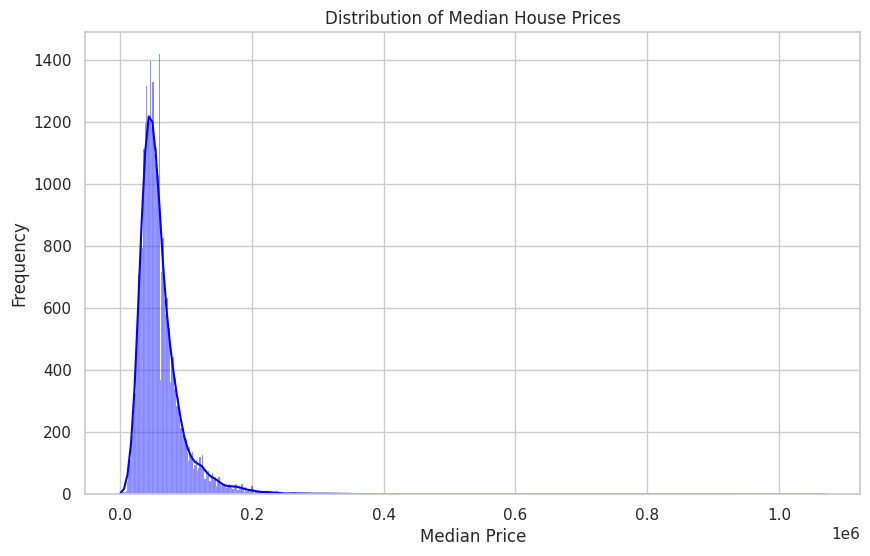

In [ ]:
# Descriptive statistics
print(combined_data.describe())
# Visualizing the distribution of median prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['median_95Q1'], kde=True, color='blue')
 # Correct column name
plt.title('Distribution of Median House Prices')
plt.xlabel('Median Price')
plt.ylabel('Frequency')
plt.show()

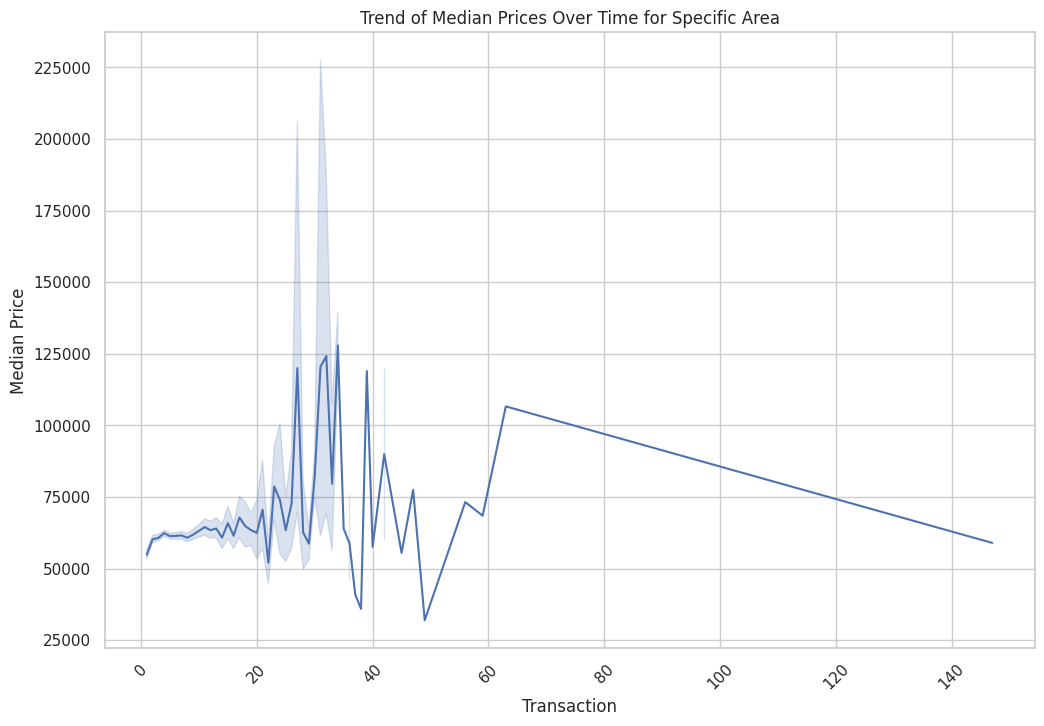

In [ ]:
#Non-Spatial Visualization
# Plotting median prices over time for a area

plt.figure(figsize=(12, 8))
sns.lineplot(x='count_95Q1', y='median_95Q1', data=combined_data)
plt.title('Trend of Median Prices Over Time for Specific Area')
plt.xlabel('Transaction')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

#print(combined_data.head())

<Figure size 640x480 with 0 Axes>

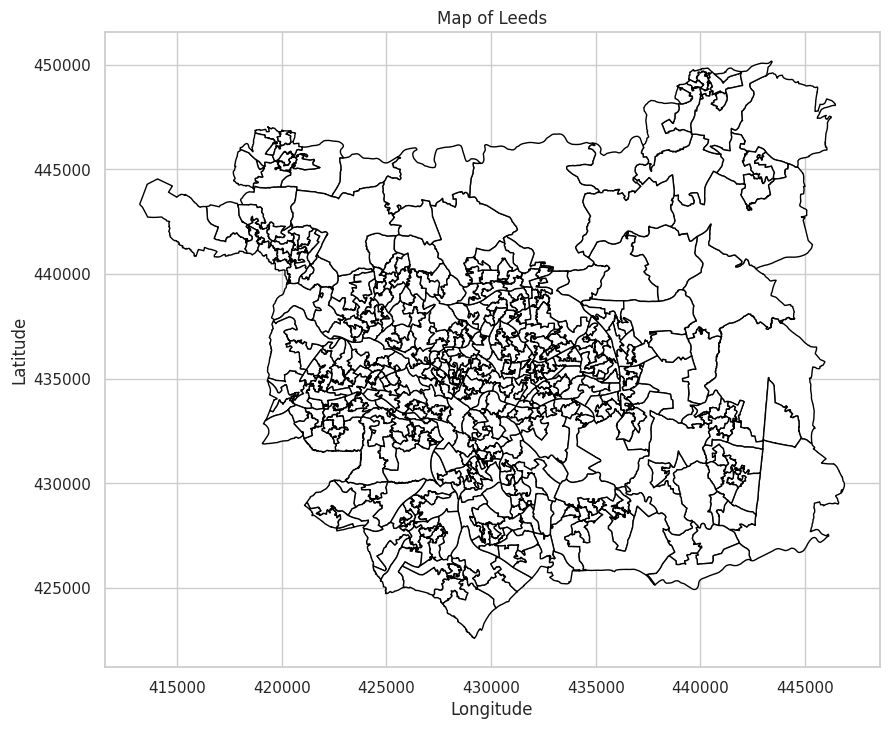

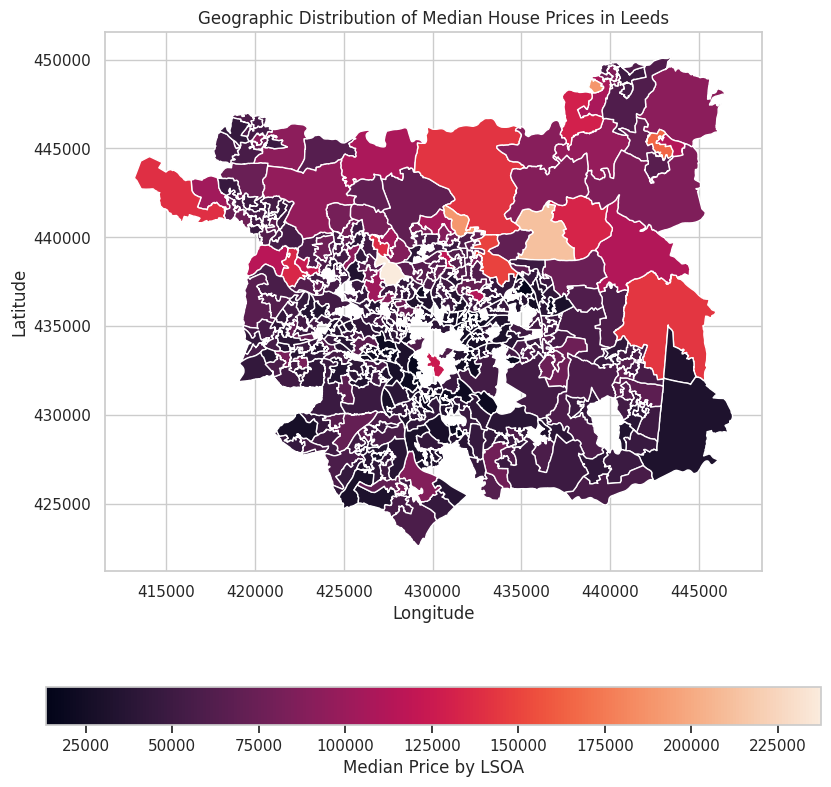

In [ ]:
# Load the GeoJSON file for Leeds
leeds_geojson = gpd.read_file('/content/Leeds.geojson')

# Plot the Leeds boundary
leeds_geojson.plot(ax=ax, color='white', edgecolor='black')
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Leeds boundary
leeds_geojson.plot(ax=ax, color='white', edgecolor='black')

# Adding title
plt.title('Map of Leeds')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

# Merge the combined data with the GeoDataFrame on 'lsoa_cd'
leeds_geojson = leeds_geojson.merge(combined_data, left_on='LSOA21CD', right_on='lsoa_cd')

fig, ax = plt.subplots(figsize=(10, 10))
leeds_geojson.plot(column='median_95Q1', ax=ax, legend=True,
                   legend_kwds={'label': "Median Price by LSOA", 'orientation': "horizontal"})
plt.title('Geographic Distribution of Median House Prices in Leeds')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()





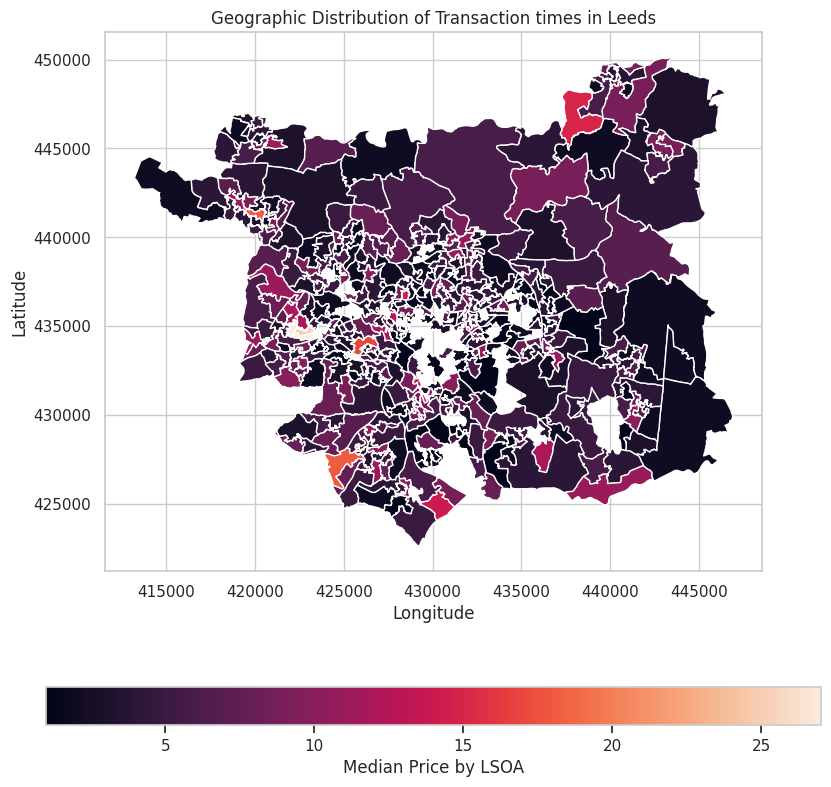

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
leeds_geojson.plot(column='count_95Q1', ax=ax, legend=True,
                   legend_kwds={'label': "Median Price by LSOA", 'orientation': "horizontal"})
plt.title('Geographic Distribution of Transaction times in Leeds')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>

In [ ]:
### Research Description

#### 1. Data Selection Process

#Data Sources:
#For this research, three primary data sources were used to investigate the relationship between median house prices and transaction counts in Leeds, UK. The datasets are:
#1.Median_Prices_Quarterly.csv: Contains quarterly median house prices for various LSOAs (Lower Layer Super Output Areas) within Leeds.
#2.Transaction_Count_Quarterly.csv: Provides the quarterly transaction counts for the same LSOAs.
#3.Leeds GeoJSON File: Contains the geographic boundaries of Leeds' LSOAs.

#Reasons for Selection:
#Relevance: Median house prices and transaction counts are essential metrics for understanding housing market dynamics.
#Granularity: LSOA-level data allows for a detailed, localized analysis.
#Availability: The datasets are publicly available and regularly updated.

#Data Relationship:
#The datasets are linked through the `lsoa_cd` column, which uniquely identifies each LSOA. Merging these datasets on the `lsoa_cd` column enables the integration of spatial boundary information with housing market data, allowing for comprehensive spatial analysis and visualization of house prices and transaction counts across Leeds.

#### 2. Code Process and Significance

#Loading Libraries:
#Essential libraries for data manipulation, geographic data handling, and plotting were imported: `pandas` for handling CSV data, `geopandas` for working with geographic data, and `matplotlib` for creating plots.

#Loading the Data:
#The median prices and transaction counts datasets were loaded into Pandas DataFrames to inspect their structure and ensure the necessary columns were present.

#Inspecting Data:
#After loading, the structure of the datasets was examined to ensure they contained the necessary columns for merging and analysis.

#Merging Datasets:
#The datasets were merged on the `lsoa_cd` column, creating a comprehensive DataFrame with both median prices and transaction counts. This ensures each row represents a unique geographic area with associated housing market data.

#Loading and Inspecting GeoJSON:
#The GeoJSON file, containing the geographic boundaries of Leeds' LSOAs, was loaded into a GeoDataFrame. Inspecting the GeoJSON data ensured that the geographic boundaries aligned correctly with the LSOA codes.

#Merging GeoDataFrame:
#The combined DataFrame was merged with the GeoDataFrame based on the LSOA codes, integrating the housing market data with geographic boundaries for spatial analysis and visualization.

#Plotting the Data:
#The data were visualized through spatial and non-spatial plots to provide insights into the relationship between transaction counts and median house prices.

#### 3. Summary of Final Plots

#Geographic Distribution of Transaction Counts in Leeds:
#The first plot is a geographic map showing the distribution of transaction counts across different LSOAs in Leeds. Each area is colored according to the number of transactions, revealing significant variation in transaction activity. This map is valuable for identifying hotspots of real estate activity and areas requiring targeted interventions.

#Trend of Median Prices Over Time for Specific Area:
#The second plot shows the trend of median prices over time for a specific area. The x-axis represents the number of transactions, while the y-axis represents the median price. The plot demonstrates significant fluctuations in median prices, with notable peaks and troughs indicating periods of high and low prices. This visualization helps understand market dynamics and identify periods of volatility.

#Geographic Distribution of Median House Prices in Leeds:
#The third plot is a geographic map of Leeds, showing the distribution of median house prices across different LSOAs. Each area is colored according to its median house price, revealing significant variation in house prices. This map is useful for identifying high and low-value areas, informing policy decisions, investment strategies, and urban planning.

### Conclusion

#This research leverages publicly available data to provide a detailed spatial and temporal analysis of the housing market in Leeds. By combining median house prices, transaction counts, and geographic boundaries, the study offers valuable insights into local real estate dynamics. The final visualizations aid in understanding current market trends and support informed decision-making for stakeholders involved in urban planning and economic development.

### Intended Audience

#Non-Spatial Visualization: This line plot is intended for policymakers and real estate analysts to identify trends in housing prices over time, providing a clear view of price volatility and market dynamics within a specific area.
#Spatial Visualizations: The geographic maps are intended for public stakeholders, urban planners, and investors to understand the distribution of house prices and transaction counts across different regions in Leeds, highlighting areas of economic disparity and potential investment opportunities.

#By using these visualizations, stakeholders can better grasp the dynamics of the housing market and address related issues effectively. The insights from this analysis can inform decisions regarding economic policies, real estate investments, and urban development strategies.